In [57]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from src.preprocess import preprocess_folder
from src.format_data import create_dataset
from src.model import create_convnet
from src.losses import wrapper, keep_back

from tensorflow.keras.optimizers import Adam
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
cube, psf, rot_angles, table = preprocess_folder(root='./data/HCI/', 
												 target_folder='./data/HCI/preprocessed')

table = table[table['snr'] > 2]

window_size = 20
dataset = create_dataset(cube, psf, rot_angles, table, window_size=window_size,
                         batch_size=1000, repeat=1, back_q=30)

model = create_convnet(window_size=window_size)

optimizer = Adam(1e-3)

loss_fn = wrapper(keep_back, decay_factor=3)

model.compile(loss_fn=loss_fn, optimizer=optimizer)

es = tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=1e-3,
        patience=50,
        mode='min',
        restore_best_weights=True,
    )


[INFO] Restoring saved values


In [79]:
# model.summary()
table = table[table['snr'] >1]
table

,x,y,flux,fwhm_mean,snr
0,90.764342,86.97999,14.502827,3.882809,6.62411


In [80]:
%%time
hist = model.fit(dataset, epochs=10000, callbacks=[es])

Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 7.8904
Epoch 2/10000
1/1 [==============================] - 0s 138ms/step - loss: 7.7139
Epoch 3/10000
1/1 [==============================] - 0s 121ms/step - loss: 7.4334
Epoch 4/10000
1/1 [==============================] - 0s 139ms/step - loss: 7.3473
Epoch 5/10000
1/1 [==============================] - 0s 148ms/step - loss: 7.2395
Epoch 6/10000
1/1 [==============================] - 0s 149ms/step - loss: 7.1995
Epoch 7/10000
1/1 [==============================] - 0s 135ms/step - loss: 7.1598
Epoch 8/10000
1/1 [==============================] - 0s 118ms/step - loss: 7.1205
Epoch 9/10000
1/1 [==============================] - 0s 159ms/step - loss: 7.0826
Epoch 10/10000
1/1 [==============================] - 0s 131ms/step - loss: 7.0483
Epoch 11/10000
1/1 [==============================] - 0s 127ms/step - loss: 7.0167
Epoch 12/10000
1/1 [==============================] - 0s 133ms/step - loss: 6.9888
Epoch 13/10000
1

1/1 [==============================] - 0s 159ms/step - loss: 5.2897
Epoch 100/10000
1/1 [==============================] - 0s 140ms/step - loss: 5.2720
Epoch 101/10000
1/1 [==============================] - 0s 135ms/step - loss: 5.2542
Epoch 102/10000
1/1 [==============================] - 0s 141ms/step - loss: 5.2382
Epoch 103/10000
1/1 [==============================] - 0s 140ms/step - loss: 5.2192
Epoch 104/10000
1/1 [==============================] - 0s 134ms/step - loss: 5.2014
Epoch 105/10000
1/1 [==============================] - 0s 149ms/step - loss: 5.1839
Epoch 106/10000
1/1 [==============================] - 0s 151ms/step - loss: 5.1686
Epoch 107/10000
1/1 [==============================] - 0s 134ms/step - loss: 5.1517
Epoch 108/10000
1/1 [==============================] - 0s 147ms/step - loss: 5.1329
Epoch 109/10000
1/1 [==============================] - 0s 151ms/step - loss: 5.1148
Epoch 110/10000
1/1 [==============================] - 0s 157ms/step - loss: 5.0991
Epoch 11

1/1 [==============================] - 0s 153ms/step - loss: 4.1325
Epoch 197/10000
1/1 [==============================] - 0s 147ms/step - loss: 4.1254
Epoch 198/10000
1/1 [==============================] - 0s 136ms/step - loss: 4.1147
Epoch 199/10000
1/1 [==============================] - 0s 134ms/step - loss: 4.1093
Epoch 200/10000
1/1 [==============================] - 0s 135ms/step - loss: 4.1091
Epoch 201/10000
1/1 [==============================] - 0s 150ms/step - loss: 4.1039
Epoch 202/10000
1/1 [==============================] - 0s 127ms/step - loss: 4.0890
Epoch 203/10000
1/1 [==============================] - 0s 139ms/step - loss: 4.0897
Epoch 204/10000
1/1 [==============================] - 0s 149ms/step - loss: 4.0904
Epoch 205/10000
1/1 [==============================] - 0s 141ms/step - loss: 4.0856
Epoch 206/10000
1/1 [==============================] - 0s 155ms/step - loss: 4.0808
Epoch 207/10000
1/1 [==============================] - 0s 147ms/step - loss: 4.0703
Epoch 20

1/1 [==============================] - 0s 151ms/step - loss: 3.7709
Epoch 294/10000
1/1 [==============================] - 0s 147ms/step - loss: 3.7674
Epoch 295/10000
1/1 [==============================] - 0s 149ms/step - loss: 3.7730
Epoch 296/10000
1/1 [==============================] - 0s 148ms/step - loss: 3.7729
Epoch 297/10000
1/1 [==============================] - 0s 141ms/step - loss: 3.7747
Epoch 298/10000
1/1 [==============================] - 0s 142ms/step - loss: 3.7750
Epoch 299/10000
1/1 [==============================] - 0s 140ms/step - loss: 3.7699
Epoch 300/10000
1/1 [==============================] - 0s 146ms/step - loss: 3.7646
Epoch 301/10000
1/1 [==============================] - 0s 137ms/step - loss: 3.7526
Epoch 302/10000
1/1 [==============================] - 0s 139ms/step - loss: 3.7450
Epoch 303/10000
1/1 [==============================] - 0s 138ms/step - loss: 3.7590
Epoch 304/10000
1/1 [==============================] - 0s 139ms/step - loss: 3.7585
Epoch 30

1/1 [==============================] - 0s 140ms/step - loss: 3.6925
Epoch 391/10000
1/1 [==============================] - 0s 147ms/step - loss: 3.6902
Epoch 392/10000
1/1 [==============================] - 0s 147ms/step - loss: 3.6927
Epoch 393/10000
1/1 [==============================] - 0s 141ms/step - loss: 3.6955
Epoch 394/10000
1/1 [==============================] - 0s 143ms/step - loss: 3.6956
Epoch 395/10000
1/1 [==============================] - 0s 145ms/step - loss: 3.6955
Epoch 396/10000
1/1 [==============================] - 0s 124ms/step - loss: 3.6976
Epoch 397/10000
1/1 [==============================] - 0s 143ms/step - loss: 3.6958
Epoch 398/10000
1/1 [==============================] - 0s 125ms/step - loss: 3.6909
Epoch 399/10000
1/1 [==============================] - 0s 131ms/step - loss: 3.6917
Epoch 400/10000
1/1 [==============================] - 0s 117ms/step - loss: 3.6904
Epoch 401/10000
1/1 [==============================] - 0s 140ms/step - loss: 3.6869
Epoch 40

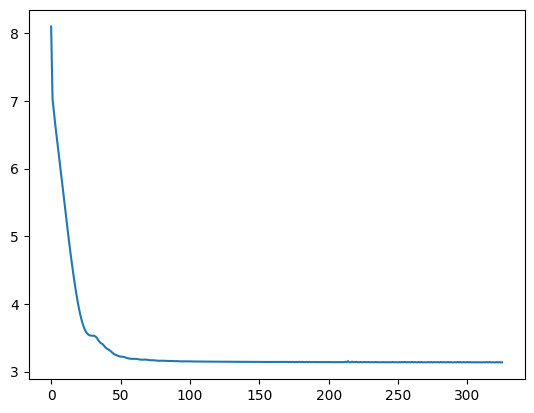

In [71]:
# move then flux|
plt.plot(hist.history['loss'])

In [72]:
test_ds = create_dataset(cube, psf, rot_angles, table, window_size=window_size, batch_size=2000, repeat=1)

In [73]:
pred, (dx, dy, flux) = model.predict(test_ds)

2/2 [==============================] - 1s 22ms/step


In [74]:
import tensorflow_probability as tfp
import tensorflow as tf

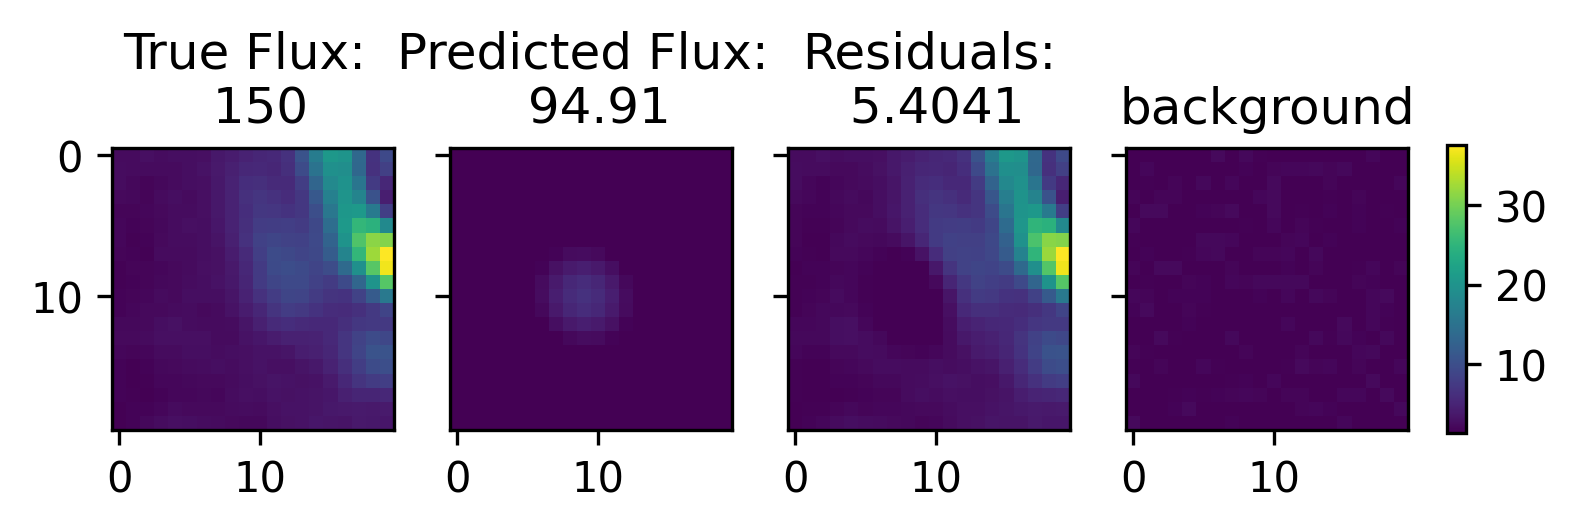

In [75]:
for x, y in test_ds:
    fig, axes = plt.subplots(1, 4, sharey=True, dpi=300)
    n = 10

    win_0 = x['windows'][n]
    win_1 = pred[n]
    back = y['windows'][n]
    
    maxv = tf.reduce_max(win_0)
    minv = tf.reduce_min(win_0)
    
    im = axes[0].imshow(win_0)
    axes[0].set_title('True Flux: \n 150')
    
    axes[1].imshow(win_1, vmin=minv, vmax=maxv)
    axes[1].set_title('Predicted Flux: \n {:.2f}'.format(flux[n]))
    
    residuals = tf.math.subtract(win_0, win_1)

    axes[2].set_title('Residuals:\n {:.4f}'.format(tf.math.reduce_mean(residuals)))
    axes[2].imshow(residuals, vmin=minv, vmax=maxv)
    

    axes[3].set_title('background')
    axes[3].imshow(back, vmin=minv, vmax=maxv)    
    
    break
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.395, 0.01, 0.2])
fig.colorbar(im, cax=cbar_ax)
plt.show()

In [76]:
from src.losses import create_circle_mask

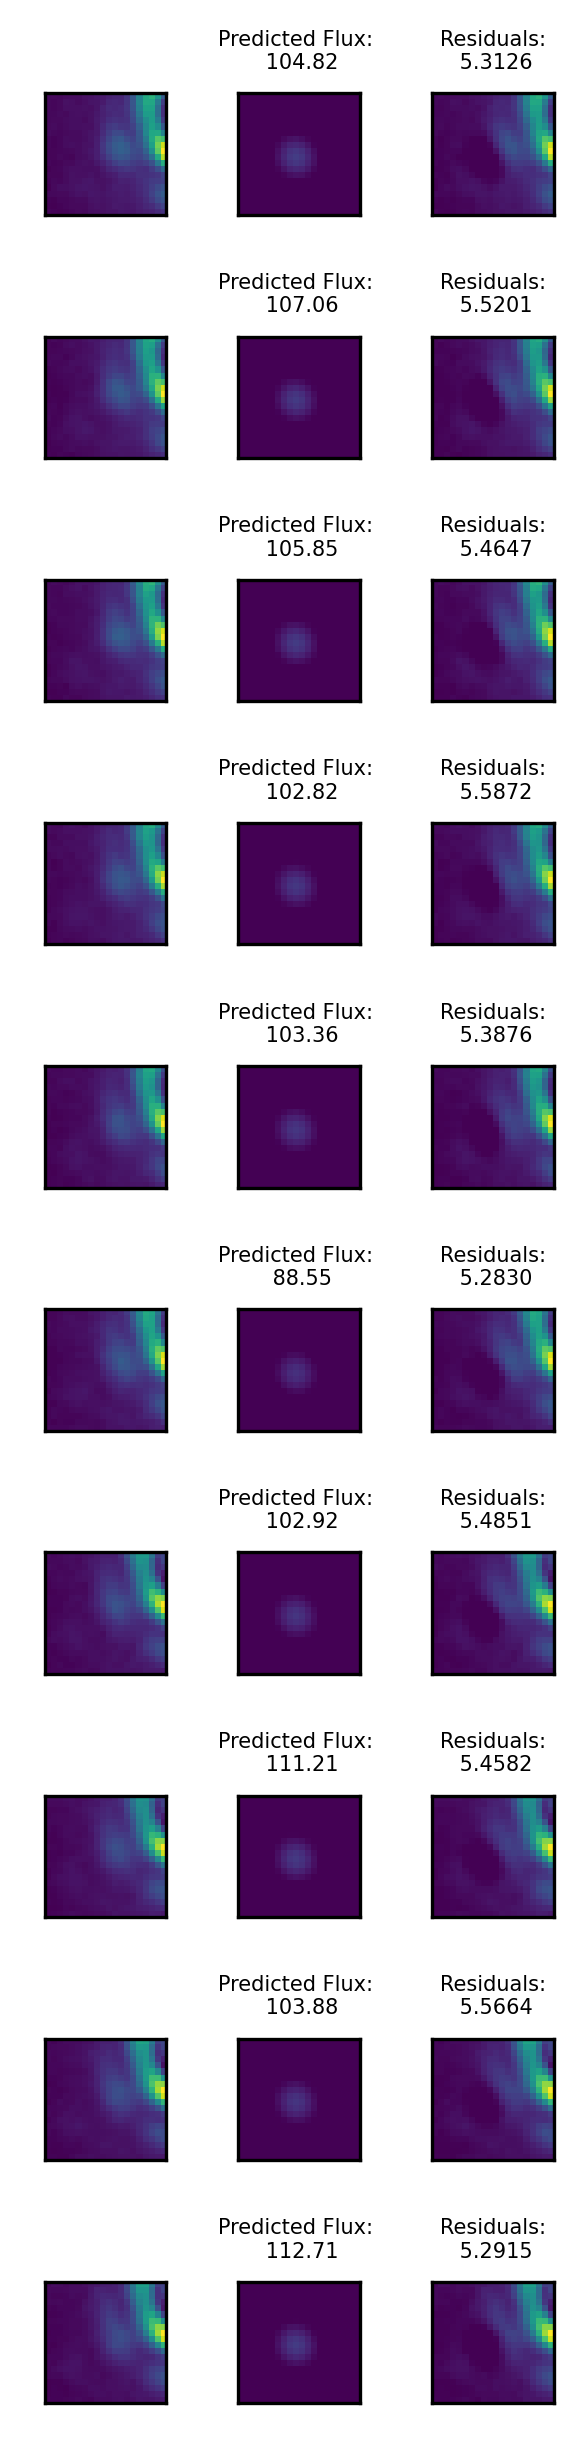

In [77]:
for x, y in test_ds:
    N = 10
    FS=5
    fig, axes = plt.subplots(N, 3, figsize=(10,10),sharey=True, sharex=True, dpi=300,
                            gridspec_kw={'hspace': 1, 'wspace': -0.9})
    
    
    for n in range(N):

        win_0 = x['windows'][n]
        win_1 = pred[n]
        back = y['windows'][n]

        maxv = tf.reduce_max(win_0)
        minv = tf.reduce_min(win_0)

        im = axes[n][0].imshow(win_0)
#         axes[n][0].set_title('True Flux: \n 150', fontsize=FS)

        axes[n][1].imshow(win_1, vmin=minv, vmax=maxv)
        axes[n][1].set_title('Predicted Flux: \n {:.2f}'.format(flux[n]), fontsize=FS)

        residuals = tf.math.subtract(win_0, win_1)

        axes[n][2].set_title('Residuals:\n {:.4f}'.format(tf.math.reduce_mean(residuals)), fontsize=FS)
        axes[n][2].imshow(residuals, vmin=minv, vmax=maxv)


#         axes[n][3].set_title('background', fontsize=FS)
#         axes[n][3].imshow(back, vmin=minv, vmax=maxv)  
        axes[n][2].set_xticks([])
        axes[n][2].set_yticks([])
    
    break
    
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.82, 0.395, 0.01, 0.2])
# fig.colorbar(im, cax=cbar_ax)
plt.show()